In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

In [2]:
W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

In [3]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [4]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

In [5]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

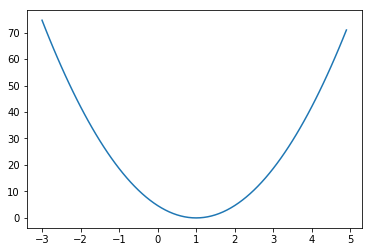

In [6]:
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [7]:
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
   sess.run(update, feed_dict={X: x_data, Y: y_data})
   print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))


(0, 16.233265, array([-0.07680959], dtype=float32))
(1, 4.6174622, array([ 0.42570156], dtype=float32))
(2, 1.3134116, array([ 0.69370747], dtype=float32))
(3, 0.37359253, array([ 0.83664399], dtype=float32))
(4, 0.10626639, array([ 0.91287678], dtype=float32))
(5, 0.030226868, array([ 0.95353431], dtype=float32))
(6, 0.0085978601, array([ 0.9752183], dtype=float32))
(7, 0.0024456102, array([ 0.98678309], dtype=float32))
(8, 0.00069563987, array([ 0.99295098], dtype=float32))
(9, 0.0001978768, array([ 0.9962405], dtype=float32))
(10, 5.6281919e-05, array([ 0.99799496], dtype=float32))
(11, 1.6010021e-05, array([ 0.99893063], dtype=float32))
(12, 4.5533452e-06, array([ 0.9994297], dtype=float32))
(13, 1.2950989e-06, array([ 0.99969584], dtype=float32))
(14, 3.6863895e-07, array([ 0.99983776], dtype=float32))
(15, 1.0486281e-07, array([ 0.99991345], dtype=float32))
(16, 2.9763854e-08, array([ 0.99995387], dtype=float32))
(17, 8.4925666e-09, array([ 0.99997538], dtype=float32))
(18, 2.407

In [9]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)
# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

(0, 5.0)
(1, 1.2666668)
(2, 1.0177778)
(3, 1.0011852)
(4, 1.000079)
(5, 1.0000052)
(6, 1.0000004)
(7, 1.0)
(8, 1.0)
(9, 1.0)


In [11]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(-3.0)
# Linear model
hypothesis = X * W
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(10):
    print(step, sess.run(W))
    sess.run(train)

(0, -3.0)
(1, 0.73333329)
(2, 0.98222226)
(3, 0.99881482)
(4, 0.99992096)
(5, 0.9999947)
(6, 0.99999964)
(7, 0.99999994)
(8, 1.0)
(9, 1.0)


In [12]:
import tensorflow as tf
X = [1, 2, 3]
Y = [1, 2, 3]
# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Compare to "Optimizer.minimize(cost)"
# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients -> editable
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

(0, [37.333332, 5.0, [(37.333332, 5.0)]])
(1, [33.848888, 4.6266665, [(33.848888, 4.6266665)]])
(2, [30.689655, 4.2881775, [(30.689655, 4.2881775)]])
(3, [27.825289, 3.981281, [(27.825289, 3.981281)]])
(4, [25.228264, 3.7030282, [(25.228264, 3.7030282)]])
(5, [22.873627, 3.4507456, [(22.873627, 3.4507456)]])
(6, [20.738754, 3.2220094, [(20.738754, 3.2220094)]])
(7, [18.803141, 3.014622, [(18.803141, 3.014622)]])
(8, [17.04818, 2.8265905, [(17.048178, 2.8265905)]])
(9, [15.457016, 2.6561089, [(15.457016, 2.6561089)]])
(10, [14.014363, 2.5015388, [(14.014362, 2.5015388)]])
(11, [12.706355, 2.3613951, [(12.706355, 2.3613951)]])
(12, [11.520428, 2.2343316, [(11.520428, 2.2343316)]])
(13, [10.445188, 2.1191273, [(10.445188, 2.1191273)]])
(14, [9.4703045, 2.0146754, [(9.4703045, 2.0146754)]])
(15, [8.5864086, 1.9199723, [(8.5864077, 1.9199723)]])
(16, [7.7850103, 1.8341082, [(7.7850103, 1.8341082)]])
(17, [7.0584097, 1.7562581, [(7.0584097, 1.7562581)]])
(18, [6.3996248, 1.6856741, [(6.39962